In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Credit_Scoring_Model/a_Dataset_CreditScoring.xlsx")



In [7]:
dataset.shape


(3000, 30)

In [8]:
dataset.head(5)

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [9]:
dataset = dataset.drop([col for col in dataset.columns if 'id' in col.lower()], axis=1)
dataset.shape


(3000, 29)

In [10]:
dataset.isna().sum()

,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,188
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0
TLCnt03,0


In [11]:
dataset=dataset.fillna(dataset.mean())

In [12]:
dataset.isna().sum()

,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,0
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0
TLCnt03,0


In [13]:
y=dataset.iloc[:, 0].values
x=dataset.iloc[:, 1:28].values

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [16]:
classifier=LogisticRegression()
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [17]:
print(confusion_matrix(y_test, y_pred))

[[482  16]
 [ 87  15]]


In [18]:
print(accuracy_score(y_test, y_pred))

0.8283333333333334


In [19]:
predictions=classifier.predict_proba(x_test)
predictions

array([[0.04200938, 0.95799062],
       [0.93712307, 0.06287693],
       [0.70429866, 0.29570134],
       ...,
       [0.97248551, 0.02751449],
       [0.44309325, 0.55690675],
       [0.8677644 , 0.1322356 ]])

In [20]:
df_prediction_prob = pd.DataFrame(predictions, columns=['prob_0', 'prob_1'])

df_prediction_target = pd.DataFrame(classifier.predict(x_test), columns=['predicted_Target'])

df_test_dataset = pd.DataFrame(y_test, columns=['Actual Outcome'])

dfx = pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.to_excel("/content/drive/MyDrive/Colab Notebooks/Credit_Scoring_Model/c1_Model_Prediction.xlsx", index=False)

dfx.head()


,Actual Outcome,prob_0,prob_1,predicted_Target
0,1,0.042009,0.957991,1
1,0,0.937123,0.062877,0
2,0,0.704299,0.295701,0
3,0,0.907845,0.092155,0
4,0,0.866252,0.133748,0


In [22]:
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

In [23]:
import matplotlib.pyplot as plt

In [24]:
data = {
    'Actual Outcome': [1, 0, 0, 0, 0],
    'prob_0': [0.042009, 0.937123, 0.704299, 0.907845, 0.866252],
    'prob_1': [0.957991, 0.062877, 0.295701, 0.092155, 0.133748],
    'predicted_Target': [1, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

In [25]:
y_true = df['Actual Outcome']
y_pred = df['predicted_Target']
y_prob = df['prob_1']

In [26]:
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_prob)

In [27]:
print("Confusion Matrix:\n", conf_matrix)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Confusion Matrix:
 [[4 0]
 [0 1]]

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC Score: 1.0000


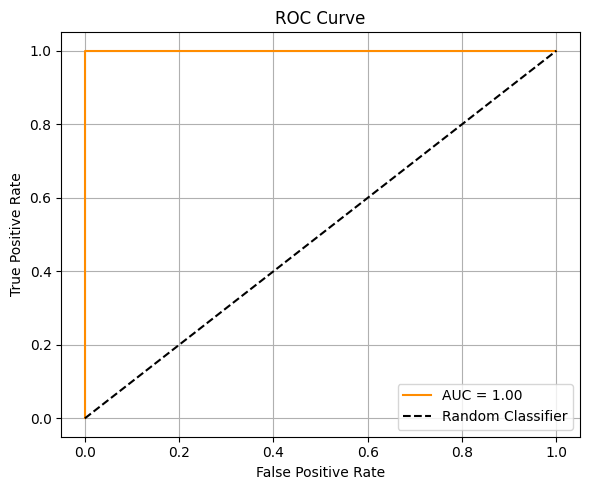

In [28]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()